在对其他复杂的模型做分析之前，我们先来看看一个简单的模型：一元高斯分布，通过对它的分析和推导，便于我们对后续复杂模型的理解

### 一.变分分布

一般来说第一步就是将变分分布推导出来，对于某一元高斯分布$N(x\mid \mu,\tau^{-1})$（这里用精度$\tau=\frac{1}{\sigma^2}$代替方差），假设我们有N个观测数据$X=\{x_1,x_2,...,x_N\}$，那么其似然函数可以写作：   

$$
p(X\mid\mu,\tau)=(\frac{\tau}{2\pi})^{\frac{N}{2}}exp\{-\frac{\tau}{2}\sum_{n=1}^N(x_n-\mu)^2\}
$$  

接下来，让我们引入它的共轭先验分布，在概率分布那一章已经介绍过了，它是一个高斯-Gamma分布：    

$$
p(\tau)=Gam(\tau\mid a_0,b_0)\\
p(\mu\mid\tau)=N(\mu\mid\mu_0,(\lambda_0\tau)^{-1})
$$  

那么，后验概率分布的形式，我们就可以写出来了：   
$$
p(\mu,\tau\mid X)=\frac{p(X\mid\mu,\tau)p(\tau)p(\mu\mid\tau)}{p(X)}\\
=\frac{p(X\mid\mu,\tau)p(\tau)p(\mu\mid\tau)}{\int p(X\mid\mu,\tau)p(\tau)p(\mu\mid\tau)d\mu d\tau}\\
=...省略...
$$  

上面不是真的要把后验概率分布的形式化简出来，只是想让大家感受一下它可能很复杂（想象一下高斯分布，Gamma分布乘在一起，还有求积分），这时就要用到第一节推导过的变分框架了，我们假设：   

$$
q(\mu,\tau)=q_\mu(\mu)q_\tau(\tau)
$$  

再次提醒一下，我们的目的是让$q(\mu,\tau)\rightarrow p(\mu,\tau\mid X)$，接下来按照第一节后面推导的表达式，可以知道最优解$q_\mu^*(\mu)$满足：    


$$
ln\ q_\mu^*(\mu)=\int_\tau q_\tau(\tau)[ln\ p(X,\mu,\tau)] d\tau+const\\
=\int_\tau q_\tau(\tau)[ln\ p(X\mid\mu,\tau)+ln\ p(\mu\mid\tau)+ln p(\tau)] d\tau+const\\
=\int_\tau q_\tau(\tau)[ln\ p(X\mid\mu,\tau)+ln\ p(\mu\mid\tau)] d\tau+const（与\mu无关的项可以并入到const中）\\
=\int_\tau q_\tau(\tau)[-\frac{\tau}{2}\sum_{n=1}^N(x_n-\mu)^2-\frac{\lambda_0\tau}{2}(\mu-\mu_0)^2]d\tau+const（这里再次将与\mu无关的项并入到const中）\\
=-\frac{E[\tau]}{2}[\lambda_0(\mu-\mu_0)^2+\sum_{n=1}^N(x_n-\mu)^2]+const\\
=-\frac{E[\tau]}{2}[\lambda_0\mu^2+\lambda_0\mu_0^2-2\lambda_0\mu_0\mu+\sum_{n=1}^N(x_n^2+\mu^2-2x_n\mu)]+const\\
=-\frac{E[\tau]}{2}[(\lambda_0+N)\mu^2-(2\lambda_0\mu_0+2\sum_{n=1}^Nx_n)\mu]+const（再次将与\mu无关的项并入到const中）\\
=-\frac{(\lambda_0+N)E[\tau]}{2}(\mu-\frac{\lambda_0\mu_0+\sum_{n=1}^Nx_n}{\lambda_0+N})^2+const（从const中提了一个与\mu无关的常数项出来）
$$  

可以发现，$q_\mu^*(\mu)$服从一个高斯分布$N(\mu\mid\mu_N,\lambda_N^{-1})$，其中：   

$$
\mu_N=\frac{\lambda_0\mu_0+N\bar{x}}{\lambda_0+N}\\
\lambda_N=(\lambda_0+N)E[\tau]
$$  

继续看下$q_\tau^*(\tau)$，它需要满足如下等式：   

$$
ln\ q_\tau^*(\tau)=\int_\mu q_\mu(\mu)[ln p(X\mid\mu,\tau)+ln\ p(\mu\mid\tau)]+ln\ p(\tau)+const\\
=\int_\mu q_\mu(\mu)[\frac{N}{2}ln\ \tau-\frac{N}{2}ln\ 2\pi-\frac{\tau}{2}\sum_{n=1}^N(x_n-\mu)^2+\frac{1}{2}ln\ \lambda_0+\frac{1}{2}ln\ \tau-\frac{1}{2}ln\ 2\pi-\frac{\lambda_0\tau}{2}(\mu-\mu_0)]d\mu+ln\ \frac{b_0^{a_0}}{\Gamma(a_0)}+(a_0-1)ln\ \tau-b_0\tau+const\\
=\int_\mu q_\mu(\mu)[\frac{N}{2}ln\ \tau-\frac{\tau}{2}\sum_{n=1}^N(x_n-\mu)^2+\frac{1}{2}ln\ \tau-\frac{\lambda_0\tau}{2}(\mu-\mu_0)]d\mu+(a_0-1)ln\ \tau-b_0\tau+const（合并与\tau无关的项目到const中）\\
=(\frac{N+1}{2}+a_0-1)ln\ \tau-\frac{\tau}{2}E_\mu[\sum_{n=1}^N(x_n-\mu)+\lambda_0(\mu-\mu_0)^2]-b_0\tau+const
$$  

可以发现$q_\tau^*(\tau)$服从一个Gamma分布$Gam(\tau\mid a_N,b_N)$，其中：   

$$
a_N=\frac{N+1}{2}+a_0\\
b_N=b_0+\frac{1}{2}E_\mu[\sum_{n=1}^N(x_n-\mu)^2+\lambda_0(\mu-\mu_0)^2]
$$  

到这里，我们可以发现这样两点情况：    

（1）无须指定$q_\mu(\mu)$和$q_\tau(\tau)$的函数形式，因为它们可以从似然函数和共轭先验自动推导出来；   

（2）虽然我们假设了$q_\mu(\mu)$和$q_\tau(\tau)$相互独立，但求解结果表明它们是相互耦合的，即$q_\mu(\mu)$依赖于$q_\tau(\tau)$，反过来$q_\tau(\tau)$依赖于$q_\mu(\mu)$

### 二.迭代优化

接下来就要考虑如何求解的问题了，由上面推导的表达式，我们可以迭代求解，比如按该顺序：$E[\tau]\rightarrow q_\mu(\mu)\rightarrow E[\mu]/E[\mu^2]\rightarrow q_\tau(\tau)\rightarrow E[\tau] \rightarrow \cdots$，所以接下来的问题就是如何设置初始值$E[\tau]$，由于两个分布相互耦合，那么初始值一定会满足某些约束（为了简化计算，我们不妨令超参数$a_0=b_0=\mu_0=\lambda_0=0$（即无信息先验）），接下来推导一下，根据Gamma分布的性质，可以知道$q_\tau(\tau)$有：    

$$
E[\tau]=\frac{a_N}{b_N}
$$   

所以：   

$$
\frac{1}{E[\tau]}=E[\frac{1}{N+1}\sum_{n=1}^N(x_n-\mu)^2]=\frac{N}{N+1}(\bar{x^2}-2\bar{x}E[\mu]+E[\mu^2])
$$  

而对于高斯分布$q_\mu(\mu)$有：   

$$
E[\mu]=\mu_N=\bar{x}
$$   

利用$var[\mu]=E[\mu^2]-E[\mu]^2=E[\mu^2]-\mu_N^2=\frac{1}{\lambda_N}$，可得：   

$$
E[\mu^2]=\mu_N^2+\frac{1}{\lambda_N}=\bar{x}^2+\frac{1}{NE[\tau]}
$$  

组合上面的几个表达式，我们就得到了$E[\tau]$的初始值：   

$$
\frac{1}{E[\tau]}=\bar{x^2}-\bar{x}^2=\frac{1}{N}\sum_{n=1}^N(x_n-\bar{x})^2
$$  

在此初始值的基础上，我们就可以不停的迭代优化下去了，大致的迭代效果如下图所示，其中绿线表示真实的后验概率分布$p(\mu,\tau\mid X)，$图（a）表示随机初始的$q_\mu(\mu)q_\tau(\tau)$，用蓝色线表示，图（b）表示利用$E[\tau]$更新$q_\mu(\mu)$后的结果，图（c）表示$q_\tau(\tau)$更新后的结果，图（d）表示多轮迭代后的最终结果， $q_\mu(\mu)q_\tau(\tau)$用红色线表示 

![avatar](./source/15_VI_一元高斯分布的迭代优化.png)

### 三.代码实现

在写代码实现进行比较之前，我们首先需要知道真正的后验概率分布是怎样的？即上面第一部分中省略的内容，我们这里其实是可以写出解析形式的（不然上一章的内容就白介绍了...），下面推导一下，根据上面的表达式，我们知道：    

$$
p(X\mid\mu,\tau)\propto \tau^{\frac{N}{2}}exp[-\frac{\tau}{2}\sum_{n=1}^N(x_n-\mu)^2]\\
p(\mu\mid\tau)\propto \tau^{\frac{1}{2}}exp[-\frac{\lambda_0\tau}{2}(\mu-\mu_0)^2]\\
p(\tau)\propto\tau^{a_0-1}exp[-b_0\tau]
$$  

所以：   

$$
p(\mu,\tau\mid X)\propto p(X\mid\mu,\tau)p(\mu\mid\tau)p(\tau)\\
\propto \tau^{\frac{N}{2}}exp[-\frac{\tau}{2}\sum_{n=1}^N(x_n-\mu)^2]\tau^{\frac{1}{2}}exp[-\frac{\lambda_0\tau}{2}(\mu-\mu_0)^2]\tau^{a_0-1}exp[-b_0\tau]\\
\propto\tau^{\frac{N+1}{2}+a_0-1}exp[-b_0\tau]exp[-\frac{\tau}{2}\sum_{n=1}^N(x_n-\mu)^2-\frac{\lambda_0\tau}{2}(\mu-\mu_0)^2]\\
\propto \tau^{\frac{N+1}{2}+a_0-1}exp[-b_0\tau]exp[-\frac{\tau}{2}\sum_{n=1}^Nx_n^2]exp[-\frac{\lambda_0\mu_0^2\tau}{2}]exp[-\frac{(\lambda_0+N)\tau}{2}(\mu-\frac{\sum_{n=1}^Nx_n+\lambda_0\mu_0}{\lambda_0+N})^2]\\
\propto \tau^{\frac{N+1}{2}+a_0-1}exp[-(b_0+\frac{1}{2}\sum_{n=1}^Nx_n^2+\frac{\lambda_0\mu_0^2}{2})\tau]exp[-\frac{(\lambda_0+N)\tau}{2}(\mu-\frac{\sum_{n=1}^Nx_n+\lambda_0\mu_0}{\lambda_0+N})^2]
$$  

可以发现前半截$\tau^{\frac{N+1}{2}+a_0-1}exp[-(b_0+\frac{1}{2}\sum_{n=1}^Nx_n^2+\frac{\lambda_0\mu_0^2}{2})\tau]$刚好就是gamma分布的形式，后半截$exp[-\frac{(\lambda_0+N)\tau}{2}(\mu-\frac{\sum_{n=1}^Nx_n+\lambda_0\mu_0}{\lambda_0+N})^2]$刚好就是高斯分布的形式，所以后验概率分布的解析形式可以直接写出来啦：   

$$
p(\mu,\tau\mid X)=N(\mu\mid \frac{\sum_{n=1}^Nx_n+\lambda_0\mu_0}{\lambda_0+N},[(\lambda_0+N)\tau]^-1)\cdot Gam(\tau\mid \frac{N+1}{2}+a_0,b_0+\frac{1}{2}\sum_{n=1}^Nx_n^2+\frac{\lambda_0\mu_0^2}{2})
$$  

同样地，我们令$a_0=b_0=\lambda_0=\mu_0=0$，我们可以定义后验概率分布的形式了

In [1]:
import numpy as np
from scipy.special import gamma
def post_prob_func(mu,tau,X):
    #先计算高斯部分的值
    u=np.mean(X)
    sigma=np.sqrt(1/(len(X)*tau))
    gassian_value=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1*np.power(mu-u,2)/(2*sigma**2))
    #再计算gamma部分的值
    a=len(X)/2+0.5
    b=0.5*np.sum(X*X)
    gamma_value=1/gamma(a)*np.power(b,a)*np.power(tau,a-1)*np.exp(-1*b*tau)
    return gassian_value*gamma_value

In [2]:
# 从标准高斯分布随机采样100个点
np.random.seed(0)
X=np.random.randn(100)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_contourf(data,func,lines=3):
    n = 256
    x = np.linspace(data[:,0].min(), data[:,0].max(), n)
    y = np.linspace(data[:,1].min(), data[:,1].max(), n)
    X, Y = np.meshgrid(x,y)
    C = plt.contour(X,Y, func(np.c_[X.reshape(-1),Y.reshape(-1)]).reshape(X.shape), lines, colors='g')

In [4]:
mu_range=np.linspace(-0.2,0.3,100)
tau_range=np.linspace(0.7,1.3,100)
data=np.vstack((mu_range,tau_range)).T

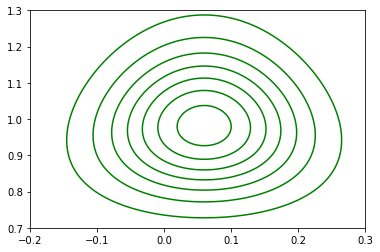

In [5]:
plot_contourf(data,lambda x:post_prob_func(x[:,0],x[:,1],X),8)

接下来就要训练$q_\mu(\mu)q_\tau(\tau)$去近似上面的后验分布了，首先定义绘图比较函数

In [6]:
def plot_vs_contourf(data,func1,func2,lines=3):
    n = 256
    x = np.linspace(data[:,0].min(), data[:,0].max(), n)
    y = np.linspace(data[:,1].min(), data[:,1].max(), n)
    X, Y = np.meshgrid(x,y)
    plt.contour(X,Y, func1(np.c_[X.reshape(-1),Y.reshape(-1)]).reshape(X.shape), lines, colors='g')
    plt.contour(X,Y, func2(np.c_[X.reshape(-1),Y.reshape(-1)]).reshape(X.shape), lines, colors='r')

定义$q_\mu(\mu)q_\tau(\tau)$的函数形式

In [7]:
def joint_dist_func(mu,tau,u,sigma,a,b):
    gassian_value=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1*np.power(mu-u,2)/(2*sigma**2))
    gamma_value=1/gamma(a)*np.power(b,a)*np.power(tau,a-1)*np.exp(-1*b*tau)
    return gassian_value*gamma_value

接下来进行迭代优化，分别截取中间过程的结果进行展示

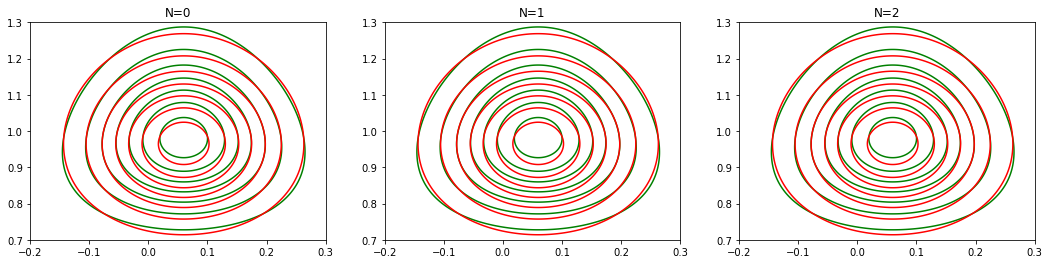

In [8]:
#计算初始的E[\tau]
E_tau=1.0/np.mean((X-np.mean(X))*(X-np.mean(X)))
#进行epoch次迭代
epoch=3
split_point=np.linspace(0,epoch-1,3).astype(int).tolist()
plt.figure(figsize = (18,4))
for count in range(0,epoch):
    #高斯分布的参数
    u=np.mean(X)
    lambd=len(X)*E_tau
    sigma=np.sqrt(1.0/lambd)
    #gamma分布的参数
    a=(len(X)+1)/2
    b=np.sum(X*X)/2-len(X)*u*u+len(X)/2*(np.power(sigma,2.0)+np.power(u,2.0))
    E_tau=a/b
    if count in split_point:
        plt.subplot(1,3,split_point.index(count)+1)
        plt.title("N="+str(count))
        plot_vs_contourf(data,lambda x:post_prob_func(x[:,0],x[:,1],X),lambda x:joint_dist_func(x[:,0],x[:,1],u,sigma,a,b),8)

可以发现一开始就基本收敛了....，接下来我们再测试一下，如果$E[\tau]$一开始随便取值会怎样，按之前的推导，应该也是会收敛的

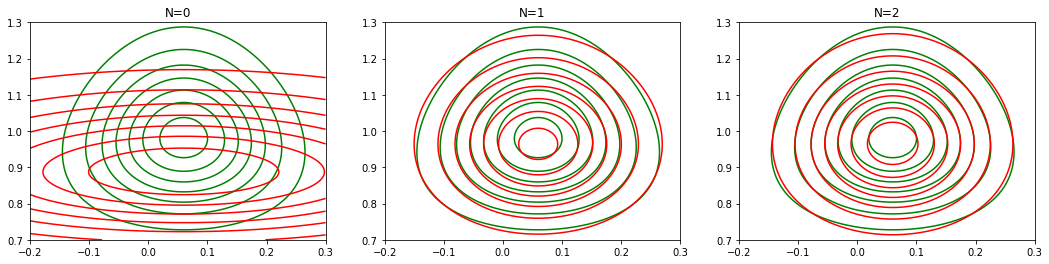

In [9]:
#计算初始的E[\tau]
E_tau=0.1
#进行epoch次迭代
epoch=3
split_point=np.linspace(0,epoch-1,3).astype(int).tolist()
plt.figure(figsize = (18,4))
for count in range(0,epoch):
    #高斯分布的参数
    u=np.mean(X)
    lambd=len(X)*E_tau
    sigma=np.sqrt(1.0/lambd)
    #gamma分布的参数
    a=(len(X)+1)/2
    b=np.sum(X*X)/2-len(X)*u*u+len(X)/2*(np.power(sigma,2.0)+np.power(u,2.0))
    E_tau=a/b
    if count in split_point:
        plt.subplot(1,3,split_point.index(count)+1)
        plt.title("N="+str(count))
        plot_vs_contourf(data,lambda x:post_prob_func(x[:,0],x[:,1],X),lambda x:joint_dist_func(x[:,0],x[:,1],u,sigma,a,b),8)

结果符合我们的预期，所以一开始其实没必要根据$E[\tau],E[\mu],E[\mu^2]$之间的约束去计算一个初始值，直接随机定义一个就可以哒

### 三.总结
根据这一页note的内容，我们将变分推断的求解流程做一个小结：   

（1）求所有变量（包括观测变量、隐变量、参数）的联合概率分布，比如一开头我们就列出了$p(X,\mu,\tau)$（只是将它拆开为$p(X\mid\mu,\tau),p(\mu\mid\tau),p(\tau)$这三部分分别表示）；   

（2）求变分分布，即通过本章第一节的公式：   

$$
ln\ q_j^*(Z_j)=E_{i\neq j}[ln\ p(X,Z)]+const
$$  

求各隐变量（参数）对应的变分分布形式；   

（3）迭代法求解最优变分分布，第（2）步求出的各变量（组）的变分分布之间是耦合，所以通常会通过迭代的方式求得它的最优形式（即$q(Z)$分布的最优参数）；   

（4）将变分分布应用到下游任务（需要用到后验概率分布的地方都可以用变分分布替代了，该页note没有涉及到这部分内容）